> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Before submitting your project, it will be a good idea to go back through your report and remove these sections to make the presentation of your work as tidy as possible. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: Soccer Dataset Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This analysis wil be investigating the _Soccer_ Database from Kaggle. It contains data for soccer matches, teams and players from European countries. Thereby, the provided information are from the year 2008 to 2016.
My intention is to answer the following two questions:
> 1.) Is there any correlation between the height and overall rating of a player? Is it positively or negatively correlated?

> 2.) What kind of attributes are pivotal to be a succesfull team?

> 3.) **Which player developed the most from 2008 to 2016?** --> Alternative question

> 4.) What is the average age of the ten worst rated players?

> **Tip**: In this section of the report, provide a brief introduction to the dataset you've selected for analysis. At the end of this section, describe the questions that you plan on exploring over the course of the report. Try to build your report around the analysis of at least one dependent variable and three independent variables. If you're not sure what questions to ask, then make sure you familiarize yourself with the dataset, its variables and the dataset context for ideas of what to explore.

> If you haven't yet selected and downloaded your data, make sure you do that first before coming back here. In order to work with the data in this workspace, you also need to upload it to the workspace. To do so, click on the jupyter icon in the upper left to be taken back to the workspace directory. There should be an 'Upload' button in the upper right that will let you add your data file(s) to the workspace. You can then click on the .ipynb file name to come back here.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> **Tip**: In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis. Make sure that you document your steps carefully and justify your cleaning decisions.

### General Properties

First of all, I am going to import all csv or txt files with Pandas.

In [39]:
df_player = pd.read_csv('Data/Player_PlayerAttributes_JOIN.csv')

To obtain an enhanced understanding for the dataset _df_matches_ I analyzed the head carefully and use the info() function.
In doing so, I observed that all id columns  seem to be useless.'

In [3]:
df_matches.head()

,id,country_name,id.1,country_id,league_name,id.2,country_id.1,league_id,season,stage,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
0,1,Belgium,1,1,Belgium Jupiler League,2,1,1,2008/2009,1,...,3.80,2.00,3.25,3.25,1.85,3.25,3.75,1.91,3.25,3.60
1,1,Belgium,1,1,Belgium Jupiler League,3,1,1,2008/2009,1,...,2.50,2.35,3.25,2.65,2.50,3.20,2.50,2.30,3.20,2.75
2,1,Belgium,1,1,Belgium Jupiler League,5,1,1,2008/2009,1,...,1.73,4.50,3.40,1.65,4.50,3.50,1.65,4.75,3.30,1.67
3,1,Belgium,1,1,Belgium Jupiler League,7,1,1,2008/2009,1,...,3.60,2.10,3.25,3.00,1.85,3.25,3.75,2.10,3.25,3.10
4,1,Belgium,1,1,Belgium Jupiler League,8,1,1,2008/2009,1,...,2.40,2.80,3.25,2.25,2.80,3.20,2.25,2.88,3.25,2.20


In [4]:
df_matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19008 entries, 0 to 19007
Columns: 120 entries, id to BSA
dtypes: float64(104), int64(12), object(4)
memory usage: 17.4+ MB


In [5]:
df_matches.describe()

,id,id.1,country_id,id.2,country_id.1,league_id,stage,match_api_id,home_team_api_id,away_team_api_id,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
count,19008.000000,19008.000000,19008.000000,19008.000000,19008.0,19008.0,19008.000000,1.900800e+04,19008.000000,19008.000000,...,14102.000000,18766.000000,18766.000000,18766.000000,13442.000000,13442.000000,13442.000000,13398.000000,13398.000000,13398.000000
mean,12452.090909,12452.090909,12452.090909,864.500000,1.0,1.0,15.770833,1.123332e+06,13810.710648,13810.710648,...,4.331273,2.396223,3.764115,4.327376,2.330565,3.585917,4.092889,2.326757,3.583933,4.041182
std,7833.195340,7833.195340,7833.195340,498.843671,0.0,0.0,8.934967,5.126806e+05,34696.561576,34696.561576,...,2.677385,1.133590,0.704597,2.805672,1.056343,0.600209,2.376579,1.050168,0.595742,2.376570
min,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000,4.924730e+05,1773.000000,1773.000000,...,1.180000,1.120000,3.000000,1.200000,1.140000,2.950000,1.180000,1.120000,3.100000,1.200000
25%,4769.000000,4769.000000,4769.000000,432.750000,1.0,1.0,8.000000,6.656252e+05,8571.000000,8571.000000,...,2.500000,1.620000,3.300000,2.450000,1.600000,3.250000,2.450000,1.620000,3.250000,2.400000
50%,13274.000000,13274.000000,13274.000000,864.500000,1.0,1.0,16.000000,1.032800e+06,9986.000000,9986.000000,...,3.400000,2.100000,3.500000,3.400000,2.050000,3.400000,3.250000,2.050000,3.350000,3.250000
75%,19694.000000,19694.000000,19694.000000,1296.250000,1.0,1.0,23.000000,1.717864e+06,9994.000000,9994.000000,...,5.500000,2.750000,3.900000,5.400000,2.650000,3.600000,5.000000,2.620000,3.600000,5.000000
max,24558.000000,24558.000000,24558.000000,1728.000000,1.0,1.0,34.000000,1.980072e+06,274581.000000,274581.000000,...,17.000000,10.000000,8.500000,26.000000,10.000000,7.000000,16.000000,9.000000,7.000000,17.000000


Hereby, I am analyzing the _df_player_ dataset the same was I did before. The key findings are identical.

In [6]:
df_player.head()

,id,player_api_id,player_name,player_fifa_api_id,birthday,height,weight,id.1,player_fifa_api_id.1,player_api_id.1,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,1,218353,505942,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,2,218353,505942,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,3,218353,505942,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,4,218353,505942,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,1,505942,Aaron Appindangoye,218353,1992-02-29 00:00:00,182.88,187,5,218353,505942,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [7]:
df_player.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 49 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    183978 non-null  int64  
 1   player_api_id         183978 non-null  int64  
 2   player_name           183978 non-null  object 
 3   player_fifa_api_id    183978 non-null  int64  
 4   birthday              183978 non-null  object 
 5   height                183978 non-null  float64
 6   weight                183978 non-null  int64  
 7   id.1                  183978 non-null  int64  
 8   player_fifa_api_id.1  183978 non-null  int64  
 9   player_api_id.1       183978 non-null  int64  
 10  date                  183978 non-null  object 
 11  overall_rating        183142 non-null  float64
 12  potential             183142 non-null  float64
 13  preferred_foot        183142 non-null  object 
 14  attacking_work_rate   180748 non-null  object 
 15  

In [8]:
df_player.describe()

,id,player_api_id,player_fifa_api_id,height,weight,id.1,player_fifa_api_id.1,player_api_id.1,overall_rating,potential,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,183978.000000,183978.000000,183978.000000,183978.000000,183978.000000,183978.00000,183978.000000,183978.000000,183142.000000,183142.000000,...,181265.000000,183142.000000,183142.000000,183142.000000,181265.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000
mean,5520.197785,135900.617324,165636.285936,181.878872,168.776245,91989.50000,165671.524291,135900.617324,68.600015,73.460353,...,57.873550,55.003986,46.772242,50.351257,48.001462,14.704393,16.063612,20.998362,16.132154,16.441439
std,3191.425870,136927.840510,53856.899802,6.394818,15.088920,53110.01825,53851.094769,136927.840510,7.041139,6.592271,...,15.144086,15.546519,21.227667,21.483706,21.598778,16.865467,15.867382,21.452980,16.099175,17.198155
min,1.000000,2625.000000,2.000000,157.480000,117.000000,1.00000,2.000000,2625.000000,33.000000,39.000000,...,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2754.000000,34763.000000,155681.000000,177.800000,159.000000,45995.25000,155798.000000,34763.000000,64.000000,69.000000,...,49.000000,45.000000,25.000000,29.000000,25.000000,7.000000,8.000000,8.000000,8.000000,8.000000
50%,5532.000000,77741.000000,183471.000000,182.880000,168.000000,91989.50000,183488.000000,77741.000000,69.000000,74.000000,...,60.000000,57.000000,50.000000,56.000000,53.000000,10.000000,11.000000,12.000000,11.000000,11.000000
75%,8256.000000,191080.000000,199843.750000,185.420000,179.000000,137983.75000,199848.000000,191080.000000,73.000000,78.000000,...,69.000000,67.000000,66.000000,69.000000,67.000000,13.000000,15.000000,15.000000,15.000000,15.000000
max,11075.000000,750584.000000,234141.000000,208.280000,243.000000,183978.00000,234141.000000,750584.000000,94.000000,97.000000,...,97.000000,96.000000,96.000000,95.000000,95.000000,94.000000,93.000000,97.000000,96.000000,96.000000


While wrangling the _df_team_ dataset I once again noticed that several the id columns are redundant. The same applies for the columns 'team_fifa_api_id.1' and 'team_api_id.1'

In [18]:
df_team.head()

,team_api_id,team_fifa_api_id,team_long_name,team_short_name,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,...,chanceCreationShooting,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass
0,9930,434,FC Aarau,AAR,2010-02-22 00:00:00,60,Balanced,NaN,Little,50,...,55,Normal,Organised,50,Medium,55,Press,45,Normal,Cover
1,9930,434,FC Aarau,AAR,2014-09-19 00:00:00,52,Balanced,48.0,Normal,56,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
2,9930,434,FC Aarau,AAR,2015-09-10 00:00:00,47,Balanced,41.0,Normal,54,...,64,Normal,Organised,47,Medium,44,Press,54,Normal,Cover
3,8485,77,Aberdeen,ABE,2010-02-22 00:00:00,70,Fast,NaN,Little,70,...,70,Lots,Organised,60,Medium,70,Double,70,Wide,Cover
4,8485,77,Aberdeen,ABE,2011-02-22 00:00:00,47,Balanced,NaN,Little,52,...,52,Normal,Organised,47,Medium,47,Press,52,Normal,Cover


In [19]:
df_team.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   team_api_id                     1458 non-null   int64  
 1   team_fifa_api_id                1458 non-null   int64  
 2   team_long_name                  1458 non-null   object 
 3   team_short_name                 1458 non-null   object 
 4   date                            1458 non-null   object 
 5   buildUpPlaySpeed                1458 non-null   int64  
 6   buildUpPlaySpeedClass           1458 non-null   object 
 7   buildUpPlayDribbling            489 non-null    float64
 8   buildUpPlayDribblingClass       1458 non-null   object 
 9   buildUpPlayPassing              1458 non-null   int64  
 10  buildUpPlayPassingClass         1458 non-null   object 
 11  buildUpPlayPositioningClass     1458 non-null   object 
 12  chanceCreationPassing           14

In [27]:
df_team.describe()

,id,team_api_id,team_fifa_api_id,id.1,team_fifa_api_id.1,team_api_id.1,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth
count,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,489.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000,1458.000000
mean,22692.858711,9995.727023,17706.982167,729.500000,17706.982167,9995.727023,52.462277,48.607362,48.490398,52.165295,53.731824,53.969136,46.017147,49.251029,52.185871
std,15015.159107,13264.869900,39179.857739,421.032659,39179.857739,13264.869900,11.545869,9.678290,10.896101,10.360793,11.086796,10.327566,10.227225,9.738028,9.574712
min,1.000000,1601.000000,1.000000,1.000000,1.000000,1601.000000,20.000000,24.000000,20.000000,21.000000,20.000000,22.000000,23.000000,24.000000,29.000000
25%,9547.250000,8457.750000,110.000000,365.250000,110.000000,8457.750000,45.000000,42.000000,40.000000,46.000000,47.000000,48.000000,39.000000,44.000000,47.000000
50%,20524.500000,8674.000000,485.000000,729.500000,485.000000,8674.000000,52.000000,49.000000,50.000000,52.000000,53.000000,53.000000,45.000000,48.000000,52.000000
75%,35294.000000,9904.000000,1900.000000,1093.750000,1900.000000,9904.000000,62.000000,55.000000,55.000000,59.000000,62.000000,61.000000,51.000000,55.000000,58.000000
max,50204.000000,274581.000000,112513.000000,1458.000000,112513.000000,274581.000000,80.000000,77.000000,80.000000,80.000000,80.000000,80.000000,72.000000,72.000000,73.000000


> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option that you can take with this project is to do a lot of explorations in an initial notebook. These don't have to be organized, but make sure you use enough comments to understand the purpose of each code cell. Then, after you're done with your analysis, create a duplicate notebook where you will trim the excess and organize your steps so that you have a flowing, cohesive report.

> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).

### Data Cleaning (Replace this with more specific notes!)

This procedure eliminates all unnecessary or identical columns to enhance the transparency of data for all loaded DataFrames.

In [32]:
df_team.drop(labels = ['id', 'id.1','team_fifa_api_id.1', 'team_api_id.1', 'team_short_name', 'team_api_id', 'team_fifa_api_id'], axis = 1, inplace = True)

In [34]:
df_team.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   team_long_name                  1458 non-null   object 
 1   date                            1458 non-null   object 
 2   buildUpPlaySpeed                1458 non-null   int64  
 3   buildUpPlaySpeedClass           1458 non-null   object 
 4   buildUpPlayDribbling            489 non-null    float64
 5   buildUpPlayDribblingClass       1458 non-null   object 
 6   buildUpPlayPassing              1458 non-null   int64  
 7   buildUpPlayPassingClass         1458 non-null   object 
 8   buildUpPlayPositioningClass     1458 non-null   object 
 9   chanceCreationPassing           1458 non-null   int64  
 10  chanceCreationPassingClass      1458 non-null   object 
 11  chanceCreationCrossing          1458 non-null   int64  
 12  chanceCreationCrossingClass     14

In [35]:
df_matches.describe()

,id,id.1,country_id,id.2,country_id.1,league_id,stage,match_api_id,home_team_api_id,away_team_api_id,...,SJA,VCH,VCD,VCA,GBH,GBD,GBA,BSH,BSD,BSA
count,19008.000000,19008.000000,19008.000000,19008.000000,19008.0,19008.0,19008.000000,1.900800e+04,19008.000000,19008.000000,...,14102.000000,18766.000000,18766.000000,18766.000000,13442.000000,13442.000000,13442.000000,13398.000000,13398.000000,13398.000000
mean,12452.090909,12452.090909,12452.090909,864.500000,1.0,1.0,15.770833,1.123332e+06,13810.710648,13810.710648,...,4.331273,2.396223,3.764115,4.327376,2.330565,3.585917,4.092889,2.326757,3.583933,4.041182
std,7833.195340,7833.195340,7833.195340,498.843671,0.0,0.0,8.934967,5.126806e+05,34696.561576,34696.561576,...,2.677385,1.133590,0.704597,2.805672,1.056343,0.600209,2.376579,1.050168,0.595742,2.376570
min,1.000000,1.000000,1.000000,1.000000,1.0,1.0,1.000000,4.924730e+05,1773.000000,1773.000000,...,1.180000,1.120000,3.000000,1.200000,1.140000,2.950000,1.180000,1.120000,3.100000,1.200000
25%,4769.000000,4769.000000,4769.000000,432.750000,1.0,1.0,8.000000,6.656252e+05,8571.000000,8571.000000,...,2.500000,1.620000,3.300000,2.450000,1.600000,3.250000,2.450000,1.620000,3.250000,2.400000
50%,13274.000000,13274.000000,13274.000000,864.500000,1.0,1.0,16.000000,1.032800e+06,9986.000000,9986.000000,...,3.400000,2.100000,3.500000,3.400000,2.050000,3.400000,3.250000,2.050000,3.350000,3.250000
75%,19694.000000,19694.000000,19694.000000,1296.250000,1.0,1.0,23.000000,1.717864e+06,9994.000000,9994.000000,...,5.500000,2.750000,3.900000,5.400000,2.650000,3.600000,5.000000,2.620000,3.600000,5.000000
max,24558.000000,24558.000000,24558.000000,1728.000000,1.0,1.0,34.000000,1.980072e+06,274581.000000,274581.000000,...,17.000000,10.000000,8.500000,26.000000,10.000000,7.000000,16.000000,9.000000,7.000000,17.000000


In [43]:
df_player.drop(labels = ['id', 'id.1', 'player_fifa_api_id.1', 'player_api_id.1', 'player_fifa_api_id', 'player_api_id'], axis = 1, inplace = True)

In [44]:
df_player.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183978 entries, 0 to 183977
Data columns (total 43 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   player_name          183978 non-null  object 
 1   birthday             183978 non-null  object 
 2   height               183978 non-null  float64
 3   weight               183978 non-null  int64  
 4   date                 183978 non-null  object 
 5   overall_rating       183142 non-null  float64
 6   potential            183142 non-null  float64
 7   preferred_foot       183142 non-null  object 
 8   attacking_work_rate  180748 non-null  object 
 9   defensive_work_rate  183142 non-null  object 
 10  crossing             183142 non-null  float64
 11  finishing            183142 non-null  float64
 12  heading_accuracy     183142 non-null  float64
 13  short_passing        183142 non-null  float64
 14  volleys              181265 non-null  float64
 15  dribbling        

In [45]:
df_player.describe()

,height,weight,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,183978.000000,183978.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000,181265.000000,183142.000000,...,181265.000000,183142.000000,183142.000000,183142.000000,181265.000000,183142.000000,183142.000000,183142.000000,183142.000000,183142.000000
mean,181.878872,168.776245,68.600015,73.460353,55.086883,49.921078,57.266023,62.429672,49.468436,59.175154,...,57.873550,55.003986,46.772242,50.351257,48.001462,14.704393,16.063612,20.998362,16.132154,16.441439
std,6.394818,15.088920,7.041139,6.592271,17.242135,19.038705,16.488905,14.194068,18.256618,17.744688,...,15.144086,15.546519,21.227667,21.483706,21.598778,16.865467,15.867382,21.452980,16.099175,17.198155
min,157.480000,117.000000,33.000000,39.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,...,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,177.800000,159.000000,64.000000,69.000000,45.000000,34.000000,49.000000,57.000000,35.000000,52.000000,...,49.000000,45.000000,25.000000,29.000000,25.000000,7.000000,8.000000,8.000000,8.000000,8.000000
50%,182.880000,168.000000,69.000000,74.000000,59.000000,53.000000,60.000000,65.000000,52.000000,64.000000,...,60.000000,57.000000,50.000000,56.000000,53.000000,10.000000,11.000000,12.000000,11.000000,11.000000
75%,185.420000,179.000000,73.000000,78.000000,68.000000,65.000000,68.000000,72.000000,64.000000,72.000000,...,69.000000,67.000000,66.000000,69.000000,67.000000,13.000000,15.000000,15.000000,15.000000,15.000000
max,208.280000,243.000000,94.000000,97.000000,95.000000,97.000000,98.000000,97.000000,93.000000,97.000000,...,97.000000,96.000000,96.000000,95.000000,95.000000,94.000000,93.000000,97.000000,96.000000,96.000000


<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Do left footed player have better finishing, crossing or overall rating stats then right footed players?

In [89]:
exceptional_rating = df_player.overall_rating > df_player.overall_rating.max()-4
underwhelming_rating = df_player.overall_rating < df_player.overall_rating.min()+4

In [90]:
df_player.acceleration[exceptional_rating].mean()

87.98181818181818

In [92]:
df_player.acceleration[underwhelming_rating].mean()

47.8

In [62]:
df_player.crossing[left_footed].mean()

60.39105358460197

In [69]:
df_player.crossing[right_footed].mean()

53.37260582765572

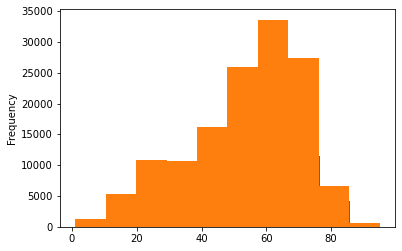

In [82]:
df_player.crossing[left_footed].plot(kind = 'hist')
df_player.crossing[right_footed].plot(kind = 'hist')

In [83]:
df_player.volleys[left_footed].mean()

49.859834807727026

In [84]:
df_player.volleys[right_footed].mean()

49.34179609062963

### What is the exact correlation between the overall rating and the acceleration?

In [ ]:
# Continue to explore the data to address your additional research
#   questions. Add more headers as needed if you have more questions to
#   investigate.


<a id='conclusions'></a>
## Conclusions

> **Tip**: Finally, summarize your findings and the results that have been performed. Make sure that you are clear with regards to the limitations of your exploration. If you haven't done any statistical tests, do not imply any statistical conclusions. And make sure you avoid implying causation from correlation!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the rubric (found on the project submission page at the end of the lesson). You should also probably remove all of the "Tips" like this one so that the presentation is as polished as possible.

## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])